# Treinando Modelos (CAP. 4)

## Regressão Linear

## Método dos Mínimos Quadrados

In [17]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1) #retorna amostras da distribuição normal padrão (GAUSS)

### Função Linear + Ruído Gaussiano

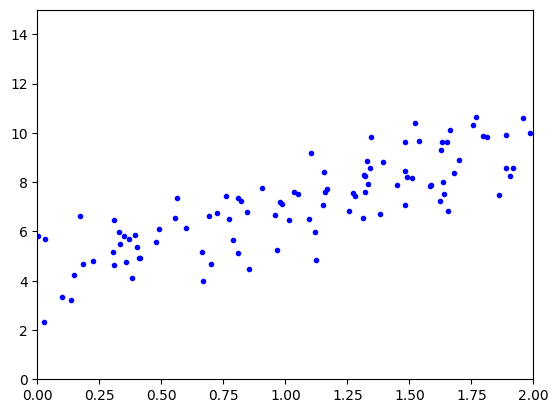

In [18]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Calculando Θ 

In [19]:
X_b = np.c_[np.ones((100,1)),X] # Adicionando x0 = 1 para toda instancia (termo de polarização)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [20]:
theta_best

array([[4.26149452],
       [2.71701881]])

### Fazendo previsões com Θ calculado:

In [21]:
X_new = np.array([[0],[2]])
y_pred = np.c_[np.ones((2,1)), X_new].dot(theta_best)
y_pred

array([[4.26149452],
       [9.69553214]])

### Plotando previsões do Modelo:

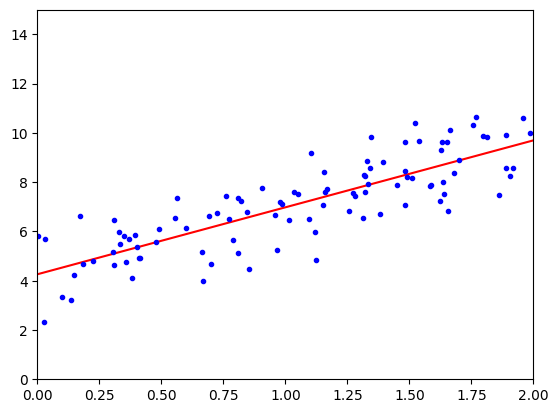

In [22]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Utilizando Scikit Learn:

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.26149452]), array([[2.71701881]]))

In [24]:
lin_reg.predict(X_new)

array([[4.26149452],
       [9.69553214]])

## Gradiente Descendente

### Gradiente Descendente em Lote:

#### Passo do Gradiente Descendente:

In [25]:
eta = 0.1 #taxa de aprendizado
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range (n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.26149452],
       [2.71701881]])

>Ao calcular as derivadas parciais da função de custo, obtemos o vetor de Gradientes  que aponta para o aumento mais acentuado da curva. Dessa forma basta ir em direção oposta aplicando a taxa de aprendizado para restringir o passo de cada iteração 

### Gradiente Descendente Estocástico:

In [ ]:
n_epochs = 50 # refere-se ao número de etapas

t0, t1 = 5, 10 # hiperparâmetros submetidos ao cronograma

def learning_schedule(t):
    return t0/(t + t1)
theta = np.random.randn(2,1) 

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) #instancia aleatória no intervalo m
        xi = X_b[random_index:random_index+1] #seleciona a coluna 0 e 1 referente ao termo de polarização e theta 1
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
